In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.color_palette('pastel')
%matplotlib inline
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.cross_validation import KFold, cross_val_score
import xgboost as xgb
#Settings
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', 100)

/usr/local/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [8]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

print(train_data.shape)
print(test_data.shape)

(576, 6)
(200, 5)


In [9]:
train_cols = train_data.columns
test_cols = test_data.columns
train_data.head()
#test_data.head()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,619,2,50,12500,98,1
1,664,0,13,3250,28,1
2,441,1,16,4000,35,1
3,160,2,20,5000,45,1
4,358,1,24,6000,77,0


In [10]:
#No N/A Values
train_data[train_data.isnull().any(axis=1)==True]

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007


In [11]:
test_data[test_data.isnull().any(axis=1)==True]

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation


In [12]:
train_data.describe()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000
mean,374.034722,9.439236,5.427083,1356.770833,34.050347,0.239583
std,216.947773,8.175454,5.740010,1435.002556,24.227672,0.427200
min,0.000000,0.000000,1.000000,250.000000,2.000000,0.000000
25%,183.750000,2.000000,2.000000,500.000000,16.000000,0.000000
50%,375.500000,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,562.500000,14.000000,7.000000,1750.000000,49.250000,0.000000
max,747.000000,74.000000,50.000000,12500.000000,98.000000,1.000000


In [13]:
test_data.describe()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation
count,200.000000,200.00000,200.000000,200.000000,200.000000
mean,374.565000,9.49500,5.935000,1483.750000,35.475000
std,211.138231,7.61907,6.125224,1531.305955,25.111197
min,1.000000,0.00000,1.000000,250.000000,2.000000
25%,198.250000,4.00000,2.000000,500.000000,14.000000
50%,377.500000,7.00000,4.000000,1000.000000,31.000000
75%,537.000000,14.00000,8.000000,2000.000000,52.000000
max,745.000000,40.00000,41.000000,10250.000000,98.000000


In [14]:
train_data.pivot_table(index=train_cols[-1], values=train_cols[1:-1],aggfunc=np.mean)

,Months since First Donation,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.)
Made Donation in March 2007,,,,
0,34.319635,10.636986,4.716895,1179.223744
1,33.195652,5.637681,7.681159,1920.289855


In [15]:
corr = train_data.loc[:,train_cols[1:]].corr()
corr

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
Months since Last Donation,1.000000,-0.159731,-0.159731,0.186899,-0.261234
Number of Donations,-0.159731,1.000000,1.000000,0.622116,0.220615
Total Volume Donated (c.c.),-0.159731,1.000000,1.000000,0.622116,0.220615
Months since First Donation,0.186899,0.622116,0.622116,1.000000,-0.019819
Made Donation in March 2007,-0.261234,0.220615,0.220615,-0.019819,1.000000


In [16]:
corr_test = test_data.loc[:,test_cols[1:]].corr()
corr_test

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation
Months since Last Donation,1.000000,-0.225752,-0.225752,0.099412
Number of Donations,-0.225752,1.000000,1.000000,0.682757
Total Volume Donated (c.c.),-0.225752,1.000000,1.000000,0.682757
Months since First Donation,0.099412,0.682757,0.682757,1.000000


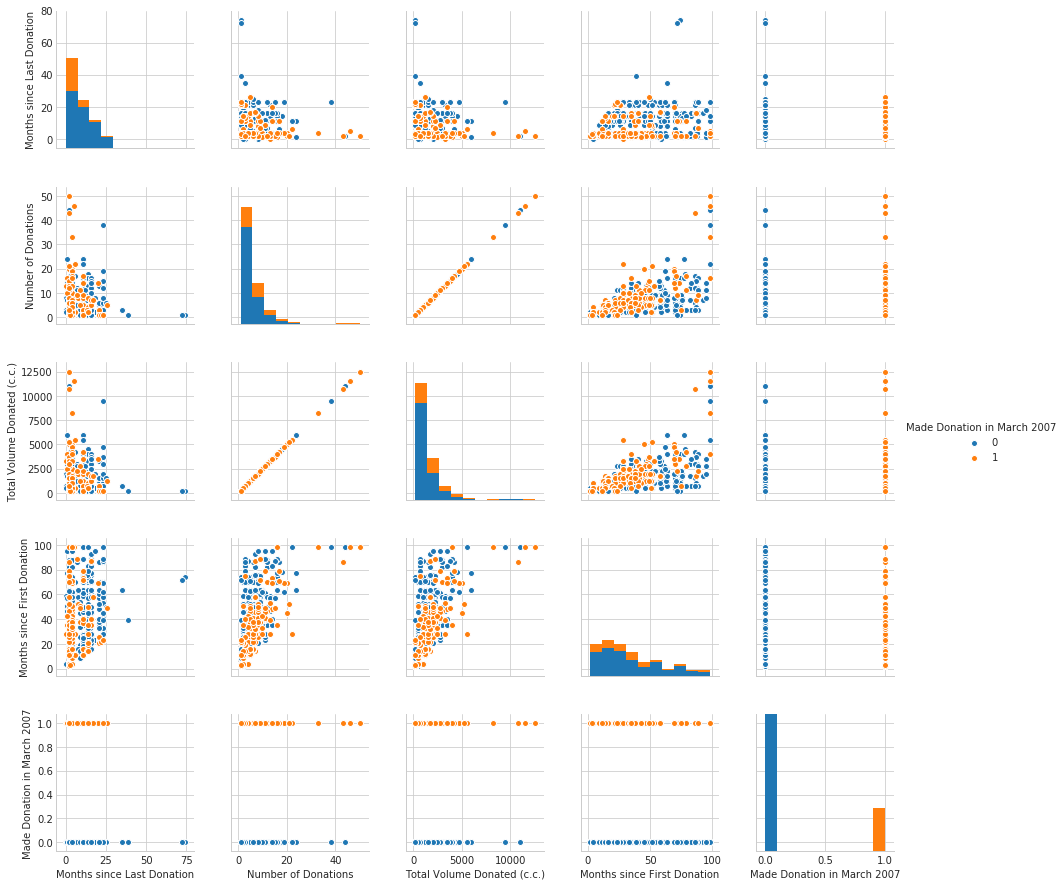

In [17]:
sns.set_style('whitegrid')
sns.pairplot(train_data.loc[:,train_cols[1:6]], hue='Made Donation in March 2007')

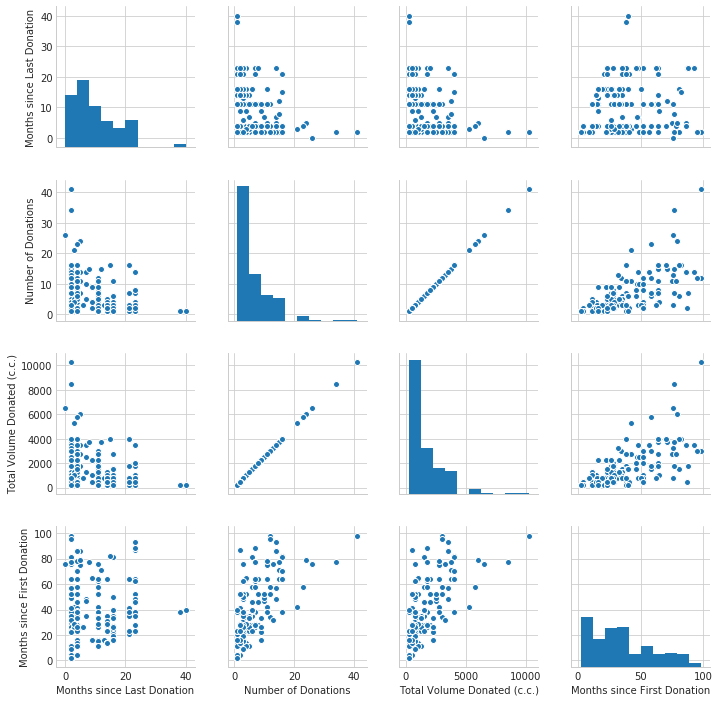

In [19]:
sns.set_style('whitegrid')
sns.pairplot(test_data.loc[:,test_cols[1:5]])

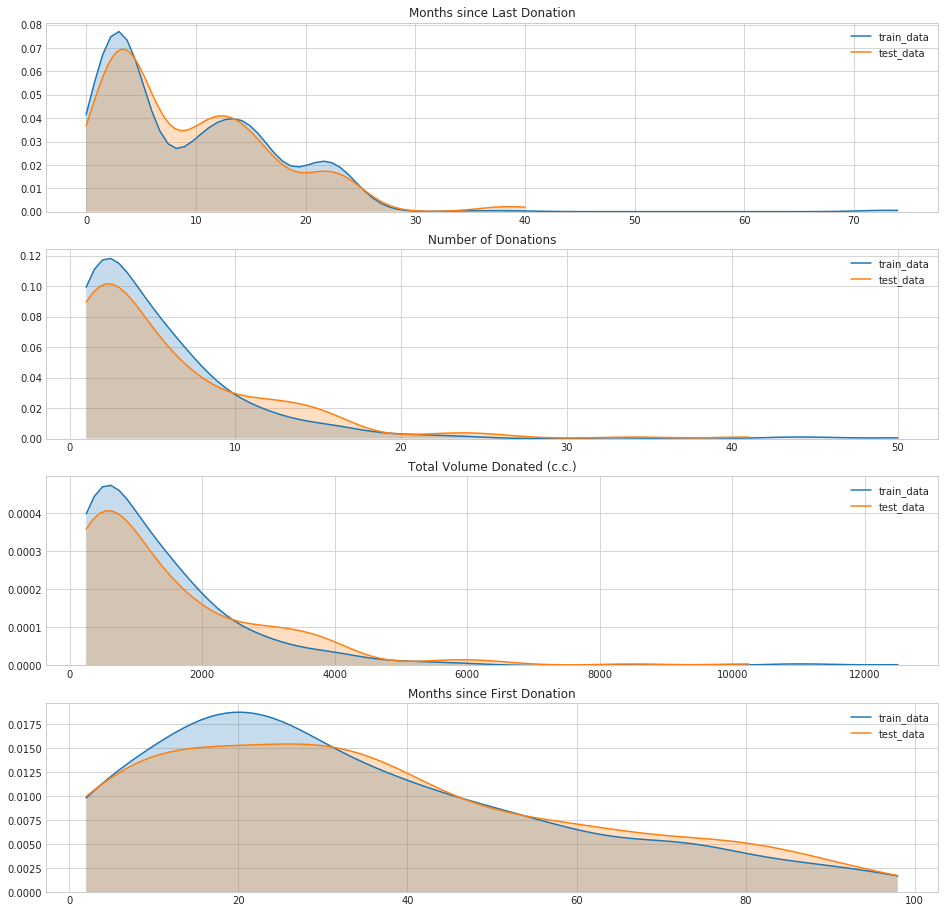

In [20]:
f = plt.figure(figsize=(16,16))
ax1 = f.add_subplot(4,1,1)
ax2 = f.add_subplot(4,1,2)
ax3 = f.add_subplot(4,1,3)
ax4 = f.add_subplot(4,1,4)

ax1.set_title('Months since Last Donation')
sns.kdeplot(train_data['Months since Last Donation'], shade=True, cut=0, label='train_data',ax=ax1)
sns.kdeplot(test_data['Months since Last Donation'], shade=True, cut=0, label='test_data',ax=ax1)

ax2.set_title('Number of Donations')
sns.kdeplot(train_data['Number of Donations'], shade=True, cut=0, label='train_data',ax=ax2)
sns.kdeplot(test_data['Number of Donations'], shade=True, cut=0, label='test_data',ax=ax2)

ax3.set_title('Total Volume Donated (c.c.)')
sns.kdeplot(train_data['Total Volume Donated (c.c.)'], shade=True, cut=0, label='train_data',ax=ax3)
sns.kdeplot(test_data['Total Volume Donated (c.c.)'], shade=True, cut=0, label='test_data',ax=ax3)

ax4.set_title('Months since First Donation')
sns.kdeplot(train_data['Months since First Donation'], shade=True, cut=0, label='train_data',ax=ax4)
sns.kdeplot(test_data['Months since First Donation'], shade=True, cut=0, label='test_data',ax=ax4)

plt.show()

In [21]:
train_data['log Months since Last Donation'] = train_data['Months since Last Donation'].apply(lambda x: np.log(x+1))
test_data['log Months since Last Donation'] = test_data['Months since Last Donation'].apply(lambda x: np.log(x+1))

train_data['log Number of Donations'] = train_data['Number of Donations'].apply(lambda x: np.log(x))
test_data['log Number of Donations'] = test_data['Number of Donations'].apply(lambda x: np.log(x))

train_data['log Total Volume Donated (c.c.)'] = train_data['Total Volume Donated (c.c.)'].apply(lambda x: np.log(x))
test_data['log Total Volume Donated (c.c.)'] = test_data['Total Volume Donated (c.c.)'].apply(lambda x: np.log(x))

train_data['log Months since First Donation'] = train_data['Months since First Donation'].apply(lambda x: np.log(x))
test_data['log Months since First Donation'] = test_data['Months since First Donation'].apply(lambda x: np.log(x))

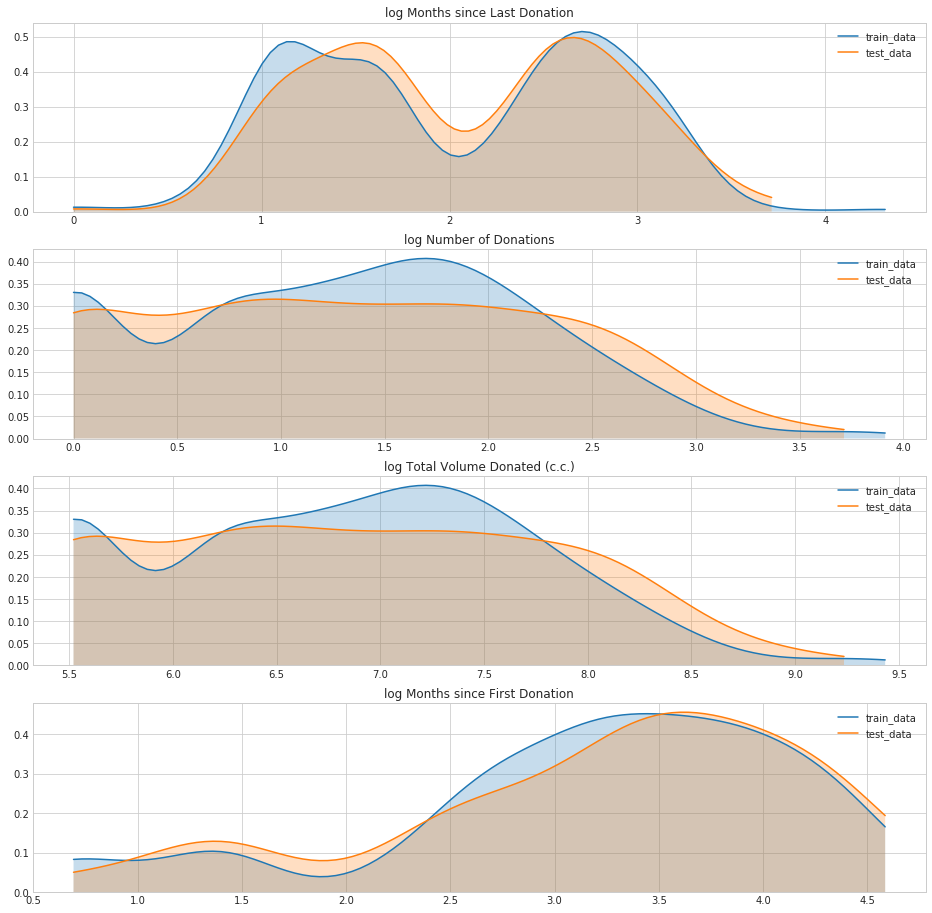

In [22]:
f = plt.figure(figsize=(16,16))
ax1 = f.add_subplot(4,1,1)
ax2 = f.add_subplot(4,1,2)
ax3 = f.add_subplot(4,1,3)
ax4 = f.add_subplot(4,1,4)

ax1.set_title('log Months since Last Donation')
sns.kdeplot(train_data['log Months since Last Donation'], shade=True, cut=0, label='train_data',ax=ax1)
sns.kdeplot(test_data['log Months since Last Donation'], shade=True, cut=0, label='test_data',ax=ax1)

ax2.set_title('log Number of Donations')
sns.kdeplot(train_data['log Number of Donations'], shade=True, cut=0, label='train_data',ax=ax2)
sns.kdeplot(test_data['log Number of Donations'], shade=True, cut=0, label='test_data',ax=ax2)

ax3.set_title('log Total Volume Donated (c.c.)')
sns.kdeplot(train_data['log Total Volume Donated (c.c.)'], shade=True, cut=0, label='train_data',ax=ax3)
sns.kdeplot(test_data['log Total Volume Donated (c.c.)'], shade=True, cut=0, label='test_data',ax=ax3)

ax4.set_title('log Months since First Donation')
sns.kdeplot(train_data['log Months since First Donation'], shade=True, cut=0, label='train_data',ax=ax4)
sns.kdeplot(test_data['log Months since First Donation'], shade=True, cut=0, label='test_data',ax=ax4)

plt.show()

In [23]:
print(train_data.columns)
print(test_data.columns)

Index(['Unnamed: 0', 'Months since Last Donation', 'Number of Donations',
       'Total Volume Donated (c.c.)', 'Months since First Donation',
       'Made Donation in March 2007', 'log Months since Last Donation',
       'log Number of Donations', 'log Total Volume Donated (c.c.)',
       'log Months since First Donation'],
      dtype='object')
Index(['Unnamed: 0', 'Months since Last Donation', 'Number of Donations',
       'Total Volume Donated (c.c.)', 'Months since First Donation',
       'log Months since Last Donation', 'log Number of Donations',
       'log Total Volume Donated (c.c.)', 'log Months since First Donation'],
      dtype='object')


In [24]:
clean_train_data = train_data[['Unnamed: 0',
                               'log Months since Last Donation',
                               'log Number of Donations',
                               'log Total Volume Donated (c.c.)',
                               'log Months since First Donation',
                               'Made Donation in March 2007']]
X_train = clean_train_data[['log Months since Last Donation',
                            'log Number of Donations', 
                            'log Total Volume Donated (c.c.)',
                            'log Months since First Donation']]
Y_train = clean_train_data[['Made Donation in March 2007']]

In [25]:
clean_test_data = test_data[['Unnamed: 0',
                             'log Months since Last Donation',
                             'log Number of Donations',
                             'log Total Volume Donated (c.c.)',
                             'log Months since First Donation']]
X_test = clean_test_data[['log Months since Last Donation',
                          'log Number of Donations', 
                          'log Total Volume Donated (c.c.)',
                          'log Months since First Donation']]

In [26]:
clean_train_data.iloc[:,1:].corr()

,log Months since Last Donation,log Number of Donations,log Total Volume Donated (c.c.),log Months since First Donation,Made Donation in March 2007
log Months since Last Donation,1.000000,-0.182444,-0.182444,0.310468,-0.284069
log Number of Donations,-0.182444,1.000000,1.000000,0.688038,0.241607
log Total Volume Donated (c.c.),-0.182444,1.000000,1.000000,0.688038,0.241607
log Months since First Donation,0.310468,0.688038,0.688038,1.000000,0.001285
Made Donation in March 2007,-0.284069,0.241607,0.241607,0.001285,1.000000


In [29]:
clean_train_data.iloc[:,1:].describe()

,log Months since Last Donation,log Number of Donations,log Total Volume Donated (c.c.),log Months since First Donation,Made Donation in March 2007
count,576.000000,576.000000,576.000000,576.000000,576.000000
mean,2.045100,1.291669,6.813130,3.175567,0.239583
std,0.799078,0.896419,0.896419,0.978782,0.427200
min,0.000000,0.000000,5.521461,0.693147,0.000000
25%,1.098612,0.693147,6.214608,2.772589,0.000000
50%,2.079442,1.386294,6.907755,3.332205,0.000000
75%,2.708050,1.945910,7.467371,3.896871,0.000000
max,4.317488,3.912023,9.433484,4.584967,1.000000


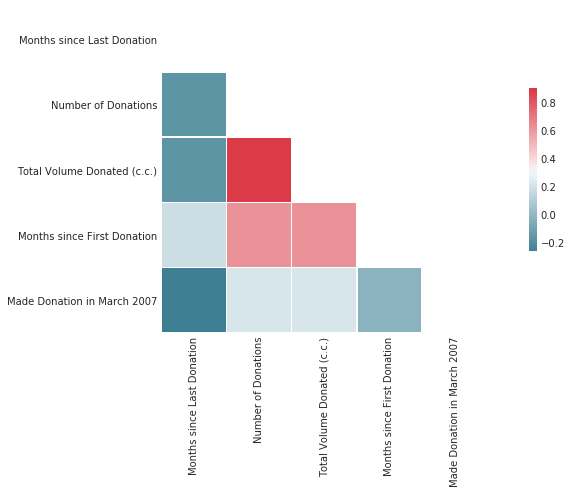

In [32]:
plt.figure(figsize=(15,6))
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr,mask=mask, cmap=cmap, vmax=.9,
            square=True,
            linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

## Modelling

In [33]:
kf_10 = KFold(train_data.shape[0], n_folds = 10, shuffle = True, random_state = 12345)

In [34]:
lr_model = LogisticRegression(random_state=12345)
lr_model.fit(X_train[:], np.ravel(Y_train))
lr_10_cv = cross_val_score(lr_model, X_train,np.ravel(Y_train), cv=kf_10)
print(np.mean(lr_10_cv));print(lr_10_cv.max());print(lr_10_cv.min());print(lr_10_cv.max()-lr_10_cv.min())
lr_model

0.7638838475499093
0.8245614035087719
0.7017543859649122
0.1228070175438597


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=12345, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [35]:
lr_param_grid = {'C': [3,2,1,0.5,0.1,0.05,0.01,0.001]}
lr_grid = GridSearchCV(lr_model, lr_param_grid, cv=10)
lr_grid.fit(X_train,np.ravel(Y_train))
lr_grid.best_params_

{'C': 0.01}

In [36]:
best_lr = LogisticRegression(C=0.01,random_state=12345)
best_lr.fit(X_train,np.ravel(Y_train))
best_lr_probs = best_lr.predict_proba(X_train)[:,1]
lr_fpr, lr_tpr, lr_thresholds = roc_curve(np.ravel(Y_train), best_lr_probs)
cross_val_score(best_lr,X_train,np.ravel(Y_train),cv=kf_10).mean()

0.7604355716878403

In [37]:
svm_model = SVC(random_state=12345)
svm_model.fit(X_train,np.ravel(Y_train))
svm_10_cv = cross_val_score(svm_model,X_train,np.ravel(Y_train),cv=kf_10)
print(np.mean(svm_10_cv));print(svm_10_cv.max());print(svm_10_cv.min());print(svm_10_cv.max()-svm_10_cv.min())
svm_model

0.7759528130671505
0.8596491228070176
0.6724137931034483
0.18723532970356926


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=12345, shrinking=True,
  tol=0.001, verbose=False)

In [38]:
svm_param_grid = {'C': [3,2,1,0.5,0.1,0.01,0.001],
                  'cache_size':[200,100,300]}
svm_grid = GridSearchCV(svm_model, svm_param_grid, cv=10)
svm_grid.fit(X_train,np.ravel(Y_train))
svm_grid.best_params_

{'C': 0.1, 'cache_size': 200}

In [39]:
best_svm = SVC(C=0.1,cache_size=200,probability=True,random_state=12345)
best_svm.fit(X_train,np.ravel(Y_train))
best_svm_probs = best_svm.predict_proba(X_train)[:,1]
svm_fpr, svm_tpr, svm_thresholds = roc_curve(np.ravel(Y_train), best_svm_probs)
cross_val_score(best_svm, X_train,np.ravel(Y_train),cv=kf_10).mean()

0.7604355716878403

In [40]:
ada_model = AdaBoostClassifier(random_state=12345)
ada_model.fit(X_train,np.ravel(Y_train))
ada_10_cv = cross_val_score(ada_model, X_train,np.ravel(Y_train),cv=kf_10)
print(np.mean(ada_10_cv));print(ada_10_cv.max());print(ada_10_cv.min());print(ada_10_cv.max()-ada_10_cv.min())
ada_model

0.7793708408953418
0.8421052631578947
0.7192982456140351
0.12280701754385959


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=12345)

In [41]:
ada_param_grid = {'learning_rate': [3,2,1,0.5,0.1,0.01,0.001],
                  'n_estimators':[10,25,50,100,200]}
ada_grid = GridSearchCV(ada_model, ada_param_grid, cv=10)
ada_grid.fit(X_train,np.ravel(Y_train))
ada_grid.best_params_

{'learning_rate': 0.5, 'n_estimators': 25}

In [42]:
best_ada = AdaBoostClassifier(learning_rate=0.5,n_estimators=25,random_state=12345)
best_ada.fit(X_train,np.ravel(Y_train))
best_ada_probs = best_ada.predict_proba(X_train)[:,1]
ada_fpr, ada_tpr, ada_thresholds = roc_curve(np.ravel(Y_train), best_ada_probs)
cross_val_score(best_ada, X_train,np.ravel(Y_train),cv=kf_10).mean()

0.7777676950998185

In [43]:
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train,np.ravel(Y_train))
xgb_10_cv = cross_val_score(xgb_model, X_train,np.ravel(Y_train),cv=kf_10)
print(np.mean(xgb_10_cv));print(xgb_10_cv.max());print(xgb_10_cv.min());print(xgb_10_cv.max()-xgb_10_cv.min())
xgb_model

/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

0.7811252268602541
0.8421052631578947
0.7068965517241379
0.1352087114337568


/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [101]:
xgb_param_grid = {'base_score': [0.75,0.5,0.1,0.01,0.001],
                  'learning_rate':[3,2,1,0.5,0.1,0.01,0.001],
                  'max_depth':[3,2,1,4,5,6],
                  'n_estimators':[100,200,300,50,25,10]}
xgb_grid = GridSearchCV(xgb_model, xgb_param_grid, cv=10)
xgb_grid.fit(X_train,np.ravel(Y_train))
xgb_grid.best_params_

{'base_score': 0.5, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}

In [44]:
best_xgb = xgb.XGBClassifier(base_score=0.5, learning_rate=0.01, n_estimators=50, max_depth=3)
best_xgb.fit(X_train,np.ravel(Y_train))
best_xgb_probs = best_xgb.predict_proba(X_train)[:,1]
xgb_fpr, xgb_tpr, xgb_thresholds = roc_curve(np.ravel(Y_train), best_xgb_probs)
cross_val_score(best_xgb,X_train,np.ravel(Y_train),cv=kf_10).mean()

/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

0.7759830611010284

In [45]:
rf_model = RandomForestClassifier(n_estimators = 100,random_state=12345)
rf_model.fit(X_train,np.ravel(Y_train))
rf_10_cv = cross_val_score(rf_model, X_train,np.ravel(Y_train),cv=kf_10)
print(np.mean(rf_10_cv));print(rf_10_cv.max());print(rf_10_cv.min());print(rf_10_cv.max()-rf_10_cv.min())
rf_model

0.7410768300060496
0.8275862068965517
0.631578947368421
0.1960072595281307


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=12345, verbose=0,
            warm_start=False)

In [46]:
rf_param_grid = {'min_samples_leaf': [1,3,5,7,9],
                  'min_samples_split':[2,3,4,5],
                  'n_estimators':[100,200,300,50,25,10]}
rf_grid = GridSearchCV(rf_model, rf_param_grid, cv=10)
rf_grid.fit(X_train,np.ravel(Y_train))
rf_grid.best_params_

{'min_samples_leaf': 9, 'min_samples_split': 2, 'n_estimators': 10}

In [47]:
best_rf = RandomForestClassifier(n_estimators=100, min_samples_leaf=9,min_samples_split=3)
best_rf.fit(X_train,np.ravel(Y_train))
best_rf_probs = best_rf.predict_proba(X_train)[:,1]
rf_fpr, rf_tpr, rf_thresholds = roc_curve(np.ravel(Y_train), best_rf_probs)
cross_val_score(best_rf,X_train,np.ravel(Y_train),cv=kf_10).mean()

0.7863581367211131

In [48]:
def re_iterate(model, X_train, Y_train, folds, iterations):
    avg_c_val_scores = []
    avg_probs = pd.DataFrame()
    for i in range(iterations):
        r_state = random.randint(1,1000000)
        kf = KFold(X_train.shape[0], n_folds=folds, shuffle=True, random_state=r_state)
        model.fit(X_train, Y_train)
        c_val_score = cross_val_score(model, X_train, Y_train,cv=kf)
        avg_c_val_scores.append(c_val_score.mean())
        probs_ = model.predict_proba(X_train)[:,1]
        avg_probs[i] = probs_
    avg_probs['total_avg'] = avg_probs.apply(lambda x: np.mean(x), axis=1)
    fpr_, tpr_, thresholds_ = roc_curve(Y_train, avg_probs.total_avg)
    return np.mean(avg_c_val_scores), avg_c_val_scores, fpr_, tpr_, thresholds_

In [49]:
lr_avg_score, lr_avg_score_list, nlr_fpr, nlr_tpr, nlr_thresholds = re_iterate(best_lr,X_train,np.ravel(Y_train),10,500)
svm_avg_score, svm_avg_score_list, nsvm_fpr, nsvm_tpr, nsvm_thresholds = re_iterate(best_svm,X_train,np.ravel(Y_train),10,500)
ada_avg_score, ada_avg_score_list, nada_fpr, nada_tpr, nada_thresholds = re_iterate(best_ada,X_train,np.ravel(Y_train),10,500)
xgb_avg_score, xgb_avg_score_list, nxgb_fpr, nxgb_tpr, nxgb_thresholds = re_iterate(best_xgb,X_train,np.ravel(Y_train),10,500)
rf_avg_score, rf_avg_score_list, nrf_fpr, nrf_tpr, nrf_thresholds = re_iterate(best_rf,X_train,np.ravel(Y_train),10,500)

/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

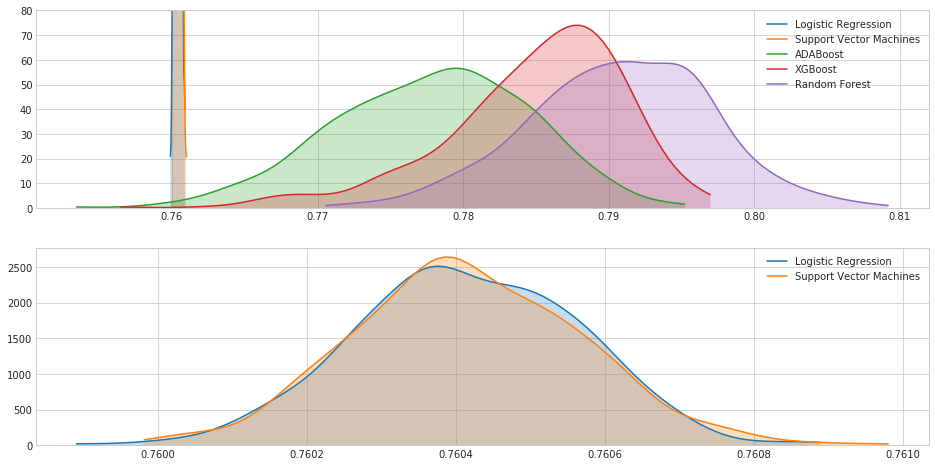

In [50]:
f2 = plt.figure(figsize=(16,8))
ax1 = f2.add_subplot(2,1,1)
ax2 = f2.add_subplot(2,1,2)

sns.kdeplot(np.asarray(lr_avg_score_list), shade=True, cut=0, label='Logistic Regression',ax=ax1)
sns.kdeplot(np.asarray(svm_avg_score_list), shade=True, cut=0, label='Support Vector Machines',ax=ax1)
sns.kdeplot(np.asarray(ada_avg_score_list), shade=True, cut=0, label='ADABoost',ax=ax1)
sns.kdeplot(np.asarray(xgb_avg_score_list), shade=True, cut=0, label='XGBoost',ax=ax1)
sns.kdeplot(np.asarray(rf_avg_score_list), shade=True, cut=0, label='Random Forest',ax=ax1)
ax1.set_ylim(0,80)

sns.kdeplot(np.asarray(lr_avg_score_list), shade=True, cut=0, label='Logistic Regression',ax=ax2)
sns.kdeplot(np.asarray(svm_avg_score_list), shade=True, cut=0, label='Support Vector Machines',ax=ax2)


plt.show()

In [51]:
print(len([i for i in ada_avg_score_list if i <= np.max(lr_avg_score_list)])/len(ada_avg_score_list))
print(len([i for i in ada_avg_score_list if i <= np.max(svm_avg_score_list)])/len(ada_avg_score_list))
print(len([i for i in xgb_avg_score_list if i <= np.max(lr_avg_score_list)])/len(xgb_avg_score_list))
print(len([i for i in xgb_avg_score_list if i <= np.max(svm_avg_score_list)])/len(xgb_avg_score_list))

0.01
0.01
0.002
0.002


In [52]:
def re_iterate_each_model(model, X_train, Y_train, folds, iterations):
    c_val_scores = []
    avg_probs = pd.DataFrame()
    for i in range(iterations):
        r_state = random.randint(1,1000000)
        kf = KFold(X_train.shape[0], n_folds=folds, shuffle=True, random_state=r_state)
        model.fit(X_train, Y_train)
        c_val_score = cross_val_score(model, X_train, Y_train,cv=kf)
        for i in c_val_score:
            c_val_scores.append(i)
        probs_ = model.predict_proba(X_train)[:,1]
        avg_probs[i] = probs_
    avg_probs['total_avg'] = avg_probs.apply(lambda x: np.mean(x), axis=1)    
    fpr_, tpr_, thresholds_ = roc_curve(Y_train, avg_probs.total_avg)
    return np.mean(c_val_scores), c_val_scores, fpr_, tpr_, thresholds_

In [53]:
lr_score_model, lr_score_list, nlr_fpr_model, nlr_tpr_model, nlr_thresholds_model = re_iterate_each_model(best_lr,X_train,np.ravel(Y_train),10,500)
svm_score_model, svm_score_list, nsvm_fpr_model, nsvm_tpr_model, nsvm_thresholds_model = re_iterate_each_model(best_svm,X_train,np.ravel(Y_train),10,500)
ada_score_model, ada_score_list, nada_fpr_model, nada_tpr_model, nada_thresholds_model = re_iterate_each_model(best_ada,X_train,np.ravel(Y_train),10,500)
xgb_score_model, xgb_score_list, nxgb_fpr_model, nxgb_tpr_model, nxgb_thresholds_model = re_iterate_each_model(best_xgb,X_train,np.ravel(Y_train),10,500)
rf_score_model, rf_score_list, nrf_fpr_model, nrf_tpr_model, nrf_thresholds_model = re_iterate_each_model(best_rf,X_train,np.ravel(Y_train),10,500)

/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/usr/local/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


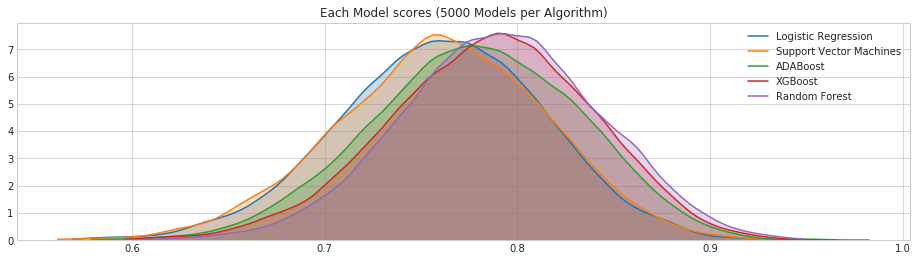

In [54]:
f3 = plt.figure(figsize=(16,4))
plt.title('Each Model scores (5000 Models per Algorithm)')
ax1 = f3.add_subplot(1,1,1)

sns.kdeplot(np.asarray(lr_score_list), shade=True, cut=0, label='Logistic Regression',ax=ax1)
sns.kdeplot(np.asarray(svm_score_list), shade=True, cut=0, label='Support Vector Machines',ax=ax1)
sns.kdeplot(np.asarray(ada_score_list), shade=True, cut=0, label='ADABoost',ax=ax1)
sns.kdeplot(np.asarray(xgb_score_list), shade=True, cut=0, label='XGBoost',ax=ax1)
sns.kdeplot(np.asarray(rf_score_list), shade=True, cut=0, label='Random Forest',ax=ax1)
#ax1.set_ylim(0,80)

plt.show()

In [55]:
print(lr_avg_score)
print(svm_avg_score)
print(ada_avg_score)
print(xgb_avg_score)
print(rf_avg_score)

0.7604146400483968
0.7604150030248034
0.777819298245614
0.7849919540229885
0.7907458560193589


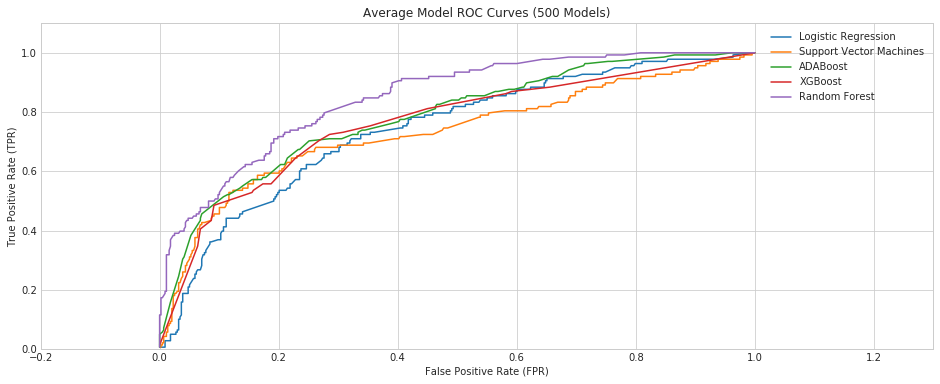

In [56]:
plt.figure(figsize=(16,6)); plt.xlim([-0.2, 1.3]); plt.ylim([0, 1.1])
plt.title('Average Model ROC Curves (500 Models)'); plt.xlabel('False Positive Rate (FPR)'); plt.ylabel('True Positive Rate (TPR)')
plt.plot(nlr_fpr, nlr_tpr, label='Logistic Regression')
plt.plot(nsvm_fpr, nsvm_tpr, label='Support Vector Machines')
plt.plot(nada_fpr, nada_tpr, label='ADABoost')
plt.plot(nxgb_fpr, nxgb_tpr, label='XGBoost')
plt.plot(nrf_fpr, nrf_tpr, label='Random Forest')
plt.legend()
plt.show()

In [57]:
def random_forest_modeller(X_train, Y_train, X_input, iterations):
    avg_c_val_scores = []
    avg_probs = pd.DataFrame()
    
    for i in range(iterations):
        kf = KFold(X_train.shape[0], n_folds=10, shuffle=True)
        kf_c_val_scores = []
        kf_probs = pd.DataFrame()
        
        for idx, (x_train_idx, x_test_idx) in enumerate(kf):
            kf_train_data = X_train.iloc[x_train_idx,:]
            kf_train_target = np.ravel(Y_train.iloc[x_train_idx,:])
            kf_test_data = X_train.iloc[x_test_idx]
            kf_test_target = np.ravel(Y_train.iloc[x_test_idx,:])
            
            model = RandomForestClassifier(n_estimators=100, min_samples_leaf=9,min_samples_split=3)
            model.fit(kf_train_data, kf_train_target)
            model_score = model.score(kf_test_data, kf_test_target)
            kf_c_val_scores.append(model_score)
            kf_predictions = model.predict_proba(X_input)[:,1]
            kf_probs[idx] = kf_predictions
            
        avg_c_val_scores.append(np.mean(kf_c_val_scores))
        kf_probs['total'] = kf_probs.apply(lambda x: np.mean(x), axis=1)
        avg_probs[i] = kf_probs.total
    
    avg_probs['final_avg'] = avg_probs.apply(lambda x: np.mean(x), axis=1)

    return np.mean(avg_c_val_scores), avg_c_val_scores, avg_probs.final_avg, avg_probs

In [58]:
f_rf_cv_score, f_rf_cv_score_list, final_predictions_df, predictions_df = random_forest_modeller(X_train,Y_train,X_test,500)

In [59]:
print(f_rf_cv_score)
print(min(f_rf_cv_score_list))
print(max(f_rf_cv_score_list))

0.7913877797943134
0.7707501512401693
0.8107985480943739


In [60]:
submission = pd.DataFrame()
submission['Unnamed: 0'] = clean_test_data['Unnamed: 0']
submission['Made Donation in March 2007'] = final_predictions_df
submission.set_index(['Unnamed: 0'],inplace=True, drop=True)
submission.head()

,Made Donation in March 2007
Unnamed: 0,
659,0.397758
276,0.152201
263,0.121395
303,0.206389
83,0.560572


In [61]:
def refine_scores(x):
    if x <0.4:
        return 0
    elif x >0.5:
        return 1
    else:
        return x
final_predictions_df.head()

0    0.397758
1    0.152201
2    0.121395
3    0.206389
4    0.560572
Name: final_avg, dtype: float64

In [62]:
final_predictions_df.describe()

count    200.000000
mean       0.226867
std        0.167323
min        0.016612
25%        0.118374
50%        0.161903
75%        0.325340
max        0.731620
Name: final_avg, dtype: float64

In [63]:
len([x for x in list(final_predictions_df) if x < 0.04])

7

In [64]:
ref_1_predictions = final_predictions_df.apply(refine_scores)
submission_ref_1 = pd.DataFrame()
submission_ref_1['Unnamed: 0'] = clean_test_data['Unnamed: 0']
submission_ref_1['Made Donation in March 2007'] = ref_1_predictions
submission_ref_1.set_index(['Unnamed: 0'],inplace=True, drop=True)
submission_ref_1.head()

,Made Donation in March 2007
Unnamed: 0,
659,0.0
276,0.0
263,0.0
303,0.0
83,1.0


In [65]:
def refine_scores_2(x):
    if x <0.1:
        return 0
    elif x >0.6:
        return 1
    else:
        return x
final_predictions_df.head()

0    0.397758
1    0.152201
2    0.121395
3    0.206389
4    0.560572
Name: final_avg, dtype: float64

In [66]:
ref_2_predictions = final_predictions_df.apply(refine_scores_2)
submission_ref_2 = pd.DataFrame()
submission_ref_2['Unnamed: 0'] = clean_test_data['Unnamed: 0']
submission_ref_2['Made Donation in March 2007'] = ref_2_predictions
submission_ref_2.set_index(['Unnamed: 0'],inplace=True, drop=True)
submission_ref_2.head()

,Made Donation in March 2007
Unnamed: 0,
659,0.397758
276,0.152201
263,0.121395
303,0.206389
83,0.560572


In [67]:
def refine_scores_3(x):
    if x <0.05:
        return 0
    elif x >0.63:
        return 1
    else:
        return x
final_predictions_df.head()

0    0.397758
1    0.152201
2    0.121395
3    0.206389
4    0.560572
Name: final_avg, dtype: float64

In [68]:
ref_3_predictions = final_predictions_df.apply(refine_scores_3)
submission_ref_3 = pd.DataFrame()
submission_ref_3['Unnamed: 0'] = clean_test_data['Unnamed: 0']
submission_ref_3['Made Donation in March 2007'] = ref_3_predictions
submission_ref_3.set_index(['Unnamed: 0'],inplace=True, drop=True)
submission_ref_3.head()

,Made Donation in March 2007
Unnamed: 0,
659,0.397758
276,0.152201
263,0.121395
303,0.206389
83,0.560572


In [69]:
def refine_scores_4(x):
    if x <0.04:
        return 0
    elif x >0.63:
        return 1
    else:
        return x
final_predictions_df.head()

0    0.397758
1    0.152201
2    0.121395
3    0.206389
4    0.560572
Name: final_avg, dtype: float64

In [70]:
ref_4_predictions = final_predictions_df.apply(refine_scores_4)
submission_ref_4 = pd.DataFrame()
submission_ref_4['Unnamed: 0'] = clean_test_data['Unnamed: 0']
submission_ref_4['Made Donation in March 2007'] = ref_4_predictions
submission_ref_4.set_index(['Unnamed: 0'],inplace=True, drop=True)
submission_ref_4.head()

,Made Donation in March 2007
Unnamed: 0,
659,0.397758
276,0.152201
263,0.121395
303,0.206389
83,0.560572


In [71]:
submission.to_csv('submission.csv', index_label = '')

In [72]:
submission_ref_1.to_csv('submission_ref_1.csv', index_label = '')

In [73]:
submission_ref_2.to_csv('submission_ref_2.csv', index_label = '')

In [74]:
submission_ref_3.to_csv('submission_ref_3.csv', index_label = '')

In [75]:
submission_ref_4.to_csv('submission_ref_4.csv', index_label = '')

In [76]:
big_cv_score, big_cv_score_list, big_final_predictions_df, big_predictions_df = random_forest_modeller(X_train,Y_train,X_test,2000)

In [77]:
big_submission = pd.DataFrame()
big_submission['Unnamed: 0'] = clean_test_data['Unnamed: 0']
big_submission['Made Donation in March 2007'] = big_final_predictions_df
big_submission.set_index(['Unnamed: 0'],inplace=True, drop=True)
big_submission.head()

,Made Donation in March 2007
Unnamed: 0,
659,0.397841
276,0.152355
263,0.121338
303,0.206997
83,0.560270


In [78]:
big_submission.to_csv('big_submission.csv',index_label='')